# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0: -1.2293e+01 -2.8391e+01  1e+02  1e+01  2e+00
 1: -2.5419e+01 -3.4794e+01  3e+01  3e+00  5e-01
 2: -3.6313e+01 -4.5893e+01  3e+01  2e+00  4e-01
 3: -4.3790e+01 -4.5825e+01  8e+00  4e-01  7e-02
 4: -4.3706e+01 -4.3902e+01  5e-01  2e-02  4e-03
 5: -4.3700e+01 -4.3727e+01  3e-02  5e-05  8e-06
 6: -4.3721e+01 -4.3723e+01  1e-03  2e-06  4e-07
 7: -4.3723e+01 -4.3723e+01  1e-05  2e-08  4e-09
Optimal solution found.


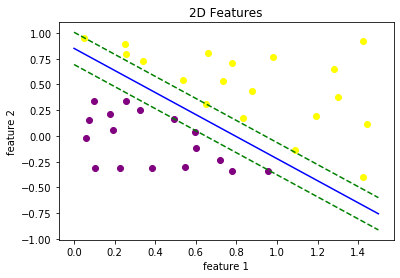

In [3]:
data = np.loadtxt('q1_data/clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

N = x.shape[0]  #num of training samples,N
features = x.shape[1]  # two features

K = y[:, None] * x *1.
K = np.dot(K, K.T) * 1.
P = matrix(K)
q = matrix(-np.ones((N, 1)))
G = matrix(-np.eye(N))
h = matrix(np.zeros(N))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

# solver
sol = solvers.qp(P, q, G, h, A,b)
alphas = np.array(sol['x'])

# weights
w = np.sum(alphas * y[:, None] * x, axis = 0)
sv = (alphas > 1e-4).reshape(-1)
# bias
b = y[sv] - np.dot(x[sv], w)
bias = b[0]
          
          
def plot_boundary(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b ) / w[1]
    x = np.linspace(0,1.5,20)
    ax.plot(x, x * slope + intercept, 'b-')
    
def plot_margin1(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b + 1)  / w[1] 
    x = np.linspace(0,1.5,20)
    ax.plot(x, x * slope + intercept, 'g--')

def plot_margin2(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b - 1)  / w[1] 
    x = np.linspace(0,1.5,20)
    ax.plot(x, x * slope + intercept, 'g--')    
    
# show data and w
fig, ax = plt.subplots()
plot_boundary(ax, w, bias)
plot_margin1(ax, w, bias)
plot_margin2(ax, w, bias)
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='yellow')
plt.scatter(x[y==-1][:,0], x[y==-1][:,1], color='purple')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("2D Features")
plt.show()

## b) and c) : Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0: -3.0198e+01 -1.1038e+01  6e+02  3e+01  4e-14
 1: -3.0101e+00 -1.0669e+01  3e+01  8e-01  4e-14
 2: -2.1035e+00 -6.2126e+00  6e+00  1e-01  9e-15
 3: -2.0595e+00 -2.6797e+00  7e-01  1e-02  7e-15
 4: -2.1895e+00 -2.4041e+00  2e-01  3e-03  4e-15
 5: -2.2354e+00 -2.3269e+00  1e-01  1e-03  3e-15
 6: -2.2630e+00 -2.2889e+00  3e-02  2e-04  4e-15
 7: -2.2726e+00 -2.2755e+00  3e-03  1e-16  5e-15
 8: -2.2739e+00 -2.2740e+00  7e-05  3e-16  4e-15
 9: -2.2739e+00 -2.2739e+00  7e-07  4e-16  4e-15
Optimal solution found.


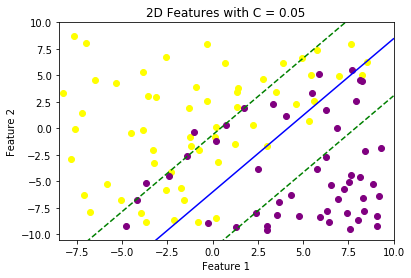

In [14]:
# Load the data set that is not linearly separable
data = np.loadtxt('q1_data/dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

def soft_SVM(x,y,C):
    N = x.shape[0]  #num of training samples,N
    features = x.shape[1]  # two features

    K = np.dot(x,x.T)
    P = matrix(np.outer(y,y)*K)
    q = matrix(-np.ones(N))
    A = matrix(y, (1,N))
    b = matrix(0.0)

    G = matrix(np.vstack((np.diag(-1 * np.ones(N)), np.eye(N))))
    h = matrix(np.hstack((np.zeros(N), np.ones(N) * C)))

    sol = solvers.qp(P, q, G, h,A,b)
    alphas = np.array(sol['x'])

    # get weights
    w = np.sum(alphas * y[:, None] * x, axis = 0)
    # get bias
    sv = (alphas > 1e-4).reshape(-1)
    b = y[sv] - np.dot(x[sv], w)
    bias = b[0]
    return (w,bias)         
          
def plot_boundary(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b + 1) / w[1]
    x = np.linspace(-8,10,20)
    ax.plot(x, x * slope + intercept, 'b-')
    
def plot_margin1(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b + 2)  / w[1] 
    x = np.linspace(-8,10,20)
    ax.plot(x, x * slope + intercept, 'g--')

def plot_margin2(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = (-b + 0)  / w[1] 
    x = np.linspace(-8,10,20)
    ax.plot(x, x * slope + intercept, 'g--')    

w_C1,bias_C1 = soft_SVM(x, y, 0.05)
fig, ax = plt.subplots()
plt.xlim(-8.5, 10)
plt.ylim(-10.5, 10)
plot_boundary(ax, w_C1, bias_C1)
plot_margin1(ax, w_C1, bias_C1)
plot_margin2(ax, w_C1, bias_C1)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'yellow')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color = 'purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Features with C = 0.05')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -3.1636e+01 -2.2062e+01  7e+02  2e+01  5e-14
 1: -5.6226e+00 -2.0649e+01  5e+01  1e+00  4e-14
 2: -4.1036e+00 -1.1247e+01  1e+01  2e-01  1e-14
 3: -4.1158e+00 -5.1806e+00  1e+00  2e-02  9e-15
 4: -4.3486e+00 -4.7028e+00  4e-01  5e-03  7e-15
 5: -4.4340e+00 -4.5760e+00  2e-01  1e-03  8e-15
 6: -4.4708e+00 -4.5230e+00  5e-02  3e-04  8e-15
 7: -4.4851e+00 -4.5034e+00  2e-02  8e-05  8e-15
 8: -4.4920e+00 -4.4945e+00  3e-03  6e-06  8e-15
 9: -4.4931e+00 -4.4932e+00  3e-05  8e-08  9e-15
10: -4.4931e+00 -4.4931e+00  3e-07  8e-10  9e-15
Optimal solution found.


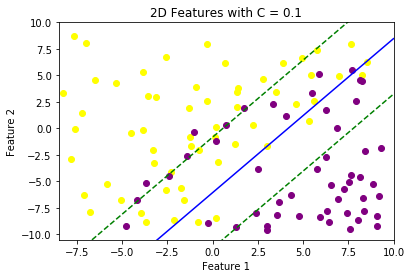

In [16]:
# C = 0.1
w_C2,bias_C2 = soft_SVM(x, y, 0.1)
fig, ax = plt.subplots()
plt.xlim(-8.5, 10)
plt.ylim(-10.5, 10)
plot_boundary(ax, w_C2, bias_C2)
plot_margin1(ax, w_C2, bias_C2)
plot_margin2(ax, w_C2, bias_C2)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'yellow')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color = 'purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Features with C = 0.1')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -5.7505e+01 -2.5873e+02  1e+03  3e+00  6e-14
 1: -4.0125e+01 -1.6918e+02  2e+02  3e-01  9e-14
 2: -3.7704e+01 -5.8598e+01  2e+01  2e-02  6e-14
 3: -4.1093e+01 -5.0709e+01  1e+01  8e-03  8e-14
 4: -4.2959e+01 -4.6523e+01  4e+00  2e-03  7e-14
 5: -4.3779e+01 -4.5280e+01  2e+00  7e-04  7e-14
 6: -4.4015e+01 -4.4900e+01  9e-01  2e-04  7e-14
 7: -4.4311e+01 -4.4534e+01  2e-01  5e-05  8e-14
 8: -4.4341e+01 -4.4483e+01  1e-01  3e-05  6e-14
 9: -4.4388e+01 -4.4429e+01  4e-02  1e-14  9e-14
10: -4.4407e+01 -4.4408e+01  8e-04  1e-14  1e-13
11: -4.4407e+01 -4.4407e+01  8e-06  5e-15  9e-14
Optimal solution found.


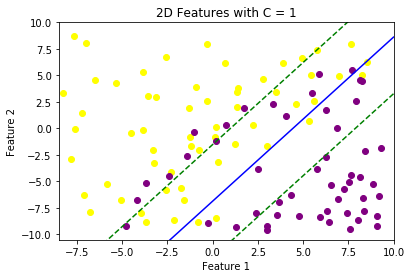

In [18]:
# C = 1
w_C3,bias_C3 = soft_SVM(x, y, 1)
fig, ax = plt.subplots()
plt.xlim(-8.5, 10)
plt.ylim(-10.5, 10)
plot_boundary(ax, w_C3, bias_C3)
plot_margin1(ax, w_C3, bias_C3)
plot_margin2(ax, w_C3, bias_C3)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'yellow')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color = 'purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Features with C = 1')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -2.8226e+03 -7.5705e+05  2e+06  6e-01  5e-12
 1: -2.4424e+03 -1.7816e+05  2e+05  1e-02  5e-12
 2: -2.6870e+03 -8.8257e+03  6e+03  3e-04  3e-12
 3: -3.5792e+03 -5.5403e+03  2e+03  8e-05  4e-12
 4: -3.8293e+03 -5.3116e+03  1e+03  5e-05  4e-12
 5: -4.0971e+03 -4.8435e+03  7e+02  2e-05  5e-12
 6: -4.2526e+03 -4.6780e+03  4e+02  1e-05  6e-12
 7: -4.3960e+03 -4.4924e+03  1e+02  4e-07  8e-12
 8: -4.4074e+03 -4.4687e+03  6e+01  1e-07  8e-12
 9: -4.4342e+03 -4.4356e+03  1e+00  2e-09  8e-12
10: -4.4348e+03 -4.4348e+03  6e-02  1e-10  7e-12
11: -4.4348e+03 -4.4348e+03  1e-03  2e-12  8e-12
Optimal solution found.


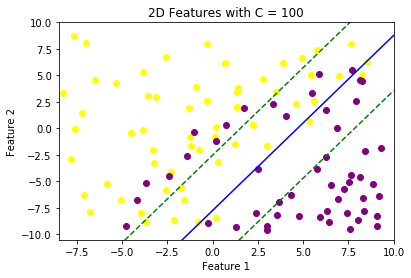

In [19]:
# C = 100
w_C4,bias_C4 = soft_SVM(x, y, 100)
fig, ax = plt.subplots()
plt.xlim(-8.5, 10)
plt.ylim(-10.5, 10)
plot_boundary(ax, w_C4, bias_C4)
plot_margin1(ax, w_C4, bias_C4)
plot_margin2(ax, w_C4, bias_C4)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'yellow')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color = 'purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Features with C = 100')
plt.show()

     pcost       dcost       gap    pres   dres
 0:  8.1127e+09 -7.3857e+13  2e+14  6e-01  4e-08
 1:  1.8686e+10 -1.6606e+13  2e+13  9e-03  4e-05
 2: -1.4230e+07 -2.8241e+11  3e+11  1e-04  5e-07
 3: -2.6039e+07 -2.9005e+09  3e+09  1e-06  4e-08
 4: -2.6381e+07 -1.0339e+08  8e+07  3e-08  4e-08
 5: -3.4041e+07 -5.7464e+07  2e+07  8e-09  5e-08
 6: -3.7746e+07 -5.3491e+07  2e+07  9e-09  5e-08
 7: -4.0548e+07 -4.9490e+07  9e+06  9e-09  6e-08
 8: -4.2701e+07 -4.6567e+07  4e+06  3e-09  7e-08
 9: -4.3915e+07 -4.5004e+07  1e+06  8e-09  7e-08
10: -4.4016e+07 -4.4780e+07  8e+05  4e-11  8e-08
11: -4.4290e+07 -4.4418e+07  1e+05  2e-09  7e-08
12: -4.4346e+07 -4.4349e+07  3e+03  1e-09  9e-08
13: -4.4347e+07 -4.4347e+07  2e+02  5e-10  8e-08
14: -4.4347e+07 -4.4347e+07  2e+00  4e-09  7e-08
Optimal solution found.


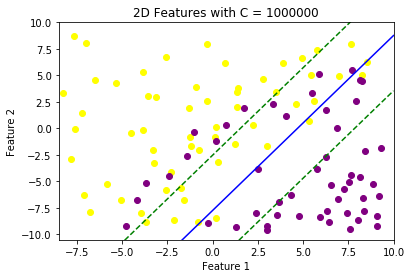

In [20]:
# C = 1000000
w_C5,bias_C5 = soft_SVM(x, y, 1000000)
fig, ax = plt.subplots()
plt.xlim(-8.5, 10)
plt.ylim(-10.5, 10)
plot_boundary(ax, w_C5, bias_C5)
plot_margin1(ax, w_C5, bias_C5)
plot_margin2(ax, w_C5, bias_C5)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color = 'yellow')
plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color = 'purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Features with C = 1000000')
plt.show()

### Explain your observations here:

With these plots, we can see that as the C value increases, the width of the margins decreases. By increasing the C value, there is less overlapping with the margins so the widtch decreases to have less overlap in the classes

## d): SVM Kernels

Case 1:  This scenario matches with figure 4. Since the C value is small here (0.02), the SVM algorithm does not punish overlapping of classes very harsh, which allows there to be overlap in the classification of the non linearly seperable data

Case 2: This scenario matches with figure 3. Since the C value is larger (20), the SVM algorithm will punish overlapping of classes more harshly, which doesn't allow for overlap in the classification of the non linearly seperable data

Case 3: This scenario matches with figure 5. We can see that the equation for K here is a quadratic function. However, second order polynomials do not have to be parabolis; they can be a hyperbolic or elliptical and figure 5 is the only figure with one of these shapes

Case 4: This scenario matches with figure 6. This is because the coefficient inside of the exponential function for equation K is relatively large (5). This allows the SVM algorithm to have more support vectors to use when calculating the decision boundary. This makes the decision boundary more overfitted to the class.

Case 5: This scenario matches with figure 1. This is because the coefficient inside of the exponential function for equation K is relatively small (1/5). This allows the SVM algorithm to have less support vectors to use when calculating the decision boundary. This makes the decision boundary more underfitted to the class.